In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


data=pd.read_csv('demo.csv')
print(data.head())

  first_name last_name blood_type marriage_status  income     device
0      Abdul     Colon         A+         married  145000  AndroidOS
1      Abdul    Pierce         B+         married   85000      MacOS
2    Desirae    Pierce         B+         MARRIED  130000        iOS
3    Shannon    Gibson         A+         married  175000      MacOS
4    Desirae    Little         B+      unmarried   130000      MacOS


In [40]:
valid_bloodtype=['A+','A-','B+','B-','AB+','AB-','O+','O-']
cat=pd.DataFrame({'blood_type':valid_bloodtype})
print(cat)

  blood_type
0         A+
1         A-
2         B+
3         B-
4        AB+
5        AB-
6         O+
7         O-


In [41]:
unique=set(data['blood_type']) #used set of unique blood types found in the blood type column
valid_set=set(cat['blood_type']) #creates a set of all valid valid_bloodtype
bogus_types=unique.difference(valid_bloodtype) #calculate set difference unique and valid set
bogus_types

{'C+', 'D-'}

In [42]:
bogus_index=data['blood_type'].isin(bogus_types) #returns a boolean series indicating which rows have bogus blood types

without=data[~bogus_index].copy() #-  inverts the Boolean Series to select rows not in bogus_types creating a copy

without['blood_type'].unique #distinct valid blood types

<bound method Series.unique of 0        A+
1        B+
2        B+
3        A+
4        B+
       ... 
9995     O+
9996    AB+
9997     B+
9998     B+
9999     O+
Name: blood_type, Length: 9910, dtype: object>

In [43]:
data['marriage_status'].unique()

array(['married', 'MARRIED', ' married', 'unmarried ', 'divorced',
       'unmarried', 'UNMARRIED', 'separated'], dtype=object)

In [44]:
inconsistent=data.copy()
inconsistent['marriage_status']=inconsistent['marriage_status'].str.lower()
inconsistent['marriage_status'].unique()

array(['married', ' married', 'unmarried ', 'divorced', 'unmarried',
       'separated'], dtype=object)

In [45]:
inconsistent['marriage_status']=inconsistent['marriage_status'].str.strip()
inconsistent['marriage_status'].unique()

array(['married', 'unmarried', 'divorced', 'separated'], dtype=object)

In [46]:
print(f"Max income-{data['income'].max()},Min income-{data['income'].min()}")

Max income-190000,Min income-40000


In [47]:
bin=[40000,75000,100000,125000,150000,np.inf]
label=['40k-75k','75k-100k','100k-125k','125k-150k','150k+']

remapping=data.copy()
remapping['income_groups']=pd.cut(remapping['income'],bins=bin,labels=label)
remapping.head()


,first_name,last_name,blood_type,marriage_status,income,device,income_groups
0,Abdul,Colon,A+,married,145000,AndroidOS,125k-150k
1,Abdul,Pierce,B+,married,85000,MacOS,75k-100k
2,Desirae,Pierce,B+,MARRIED,130000,iOS,125k-150k
3,Shannon,Gibson,A+,married,175000,MacOS,150k+
4,Desirae,Little,B+,unmarried,130000,MacOS,125k-150k


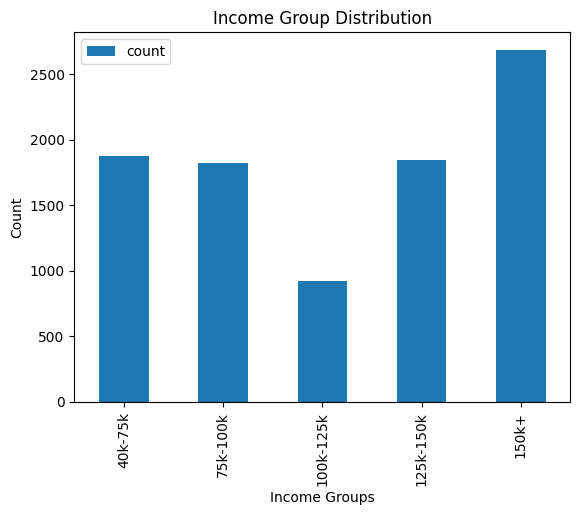

In [48]:
remapping['income_groups'].value_counts().sort_index().plot.bar()
plt.title('Income Group Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')
plt.legend()
plt.show()

In [49]:
import random
phone=[]

for i in range(100):
    num=random.randint(100000000,9999999999)
    if i%2==0:
        phone.append('+91 '+str(num))
    else:
        phone.append(str(num))
numbers=pd.DataFrame({'phone_numbers':phone})
numbers.head()

,phone_numbers
0,+91 7011102272
1,3855492378
2,+91 9609431212
3,1071398280
4,+91 4443530991


In [50]:
numbers['phone_numbers']=numbers['phone_numbers'].str.replace(r'\+91','',regex=True)
num_digits=numbers['phone_numbers'].str.len()

invalid_index=numbers[num_digits<10].index
numbers.drop(invalid_index,inplace=True)

numbers.dropna(inplace=True)
numbers.reset_index(drop=True,inplace=True)

numbers.head()


,phone_numbers
0,7011102272
1,3855492378
2,9609431212
3,1071398280
4,4443530991


In [52]:
assert not numbers['phone_numbers'].str.contains(r'\+91').any(),"Found phone numbers with +91 prefix"
assert (numbers['phone_numbers'].str.len()==10).all(),"some phone numbers do not have 10 digits"


AssertionError: some phone numbers do not have 10 digits

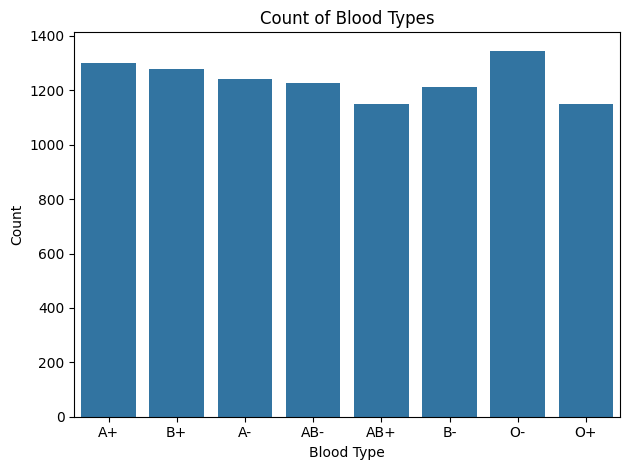

In [54]:
import seaborn as sns
sns.countplot(x='blood_type',data=without)
plt.title('Count of Blood Types')
plt.xlabel('Blood Type')
plt.ylabel('Count')
plt.tight_layout() #used  Without it, labels might get clipped or overlap. With it, everything fits nicely Let me know if you want to see how it compares visually with and without!

plt.show()

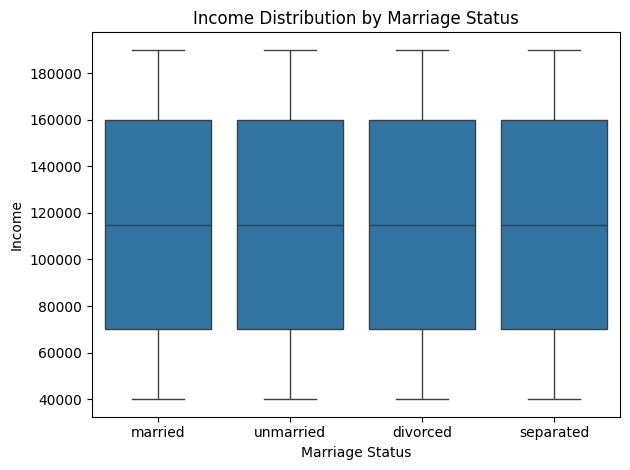

In [55]:
sns.boxplot(x='marriage_status', y='income', data=inconsistent)

plt.title('Income Distribution by Marriage Status')
plt.xlabel('Marriage Status')
plt.ylabel('Income') 
plt.tight_layout()
plt.show()

In [ ]:
l=LabelEncoder()
without['blood_type_encoded']=l.fit_transform(without['blood_type']) #mean - LabelEncoder() → creates an encoder object l that can convert categories (like 'A+', 'O-', etc.) into integers.
without[['blood_type','blood_type_encoded']].drop_duplicates()



,blood_type,blood_type_encoded
0,A+,0
1,B+,4
5,A-,1
7,AB-,3
9,AB+,2
10,B-,5
12,O-,7
21,O+,6


In [59]:
inconsistent=pd.get_dummies(inconsistent,columns=['marriage_status'])
inconsistent.head()

,first_name,last_name,blood_type,income,device,marriage_status_divorced,marriage_status_married,marriage_status_separated,marriage_status_unmarried
0,Abdul,Colon,A+,145000,AndroidOS,False,True,False,False
1,Abdul,Pierce,B+,85000,MacOS,False,True,False,False
2,Desirae,Pierce,B+,130000,iOS,False,True,False,False
3,Shannon,Gibson,A+,175000,MacOS,False,True,False,False
4,Desirae,Little,B+,130000,MacOS,False,False,False,True


In [60]:
custom_map={
    '40k-75k':1,
    '75k-100k':2,
    '100k-125k':3,
    '125k-150k':4,
    '150k':5
}

remapping['income_groups_encoded']=remapping['income_groups'].map(custom_map)
remapping[['income','income_groups','income_groups_encoded']].head()

,income,income_groups,income_groups_encoded
0,145000,125k-150k,4.0
1,85000,75k-100k,2.0
2,130000,125k-150k,4.0
3,175000,150k+,NaN
4,130000,125k-150k,4.0
